# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [3]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

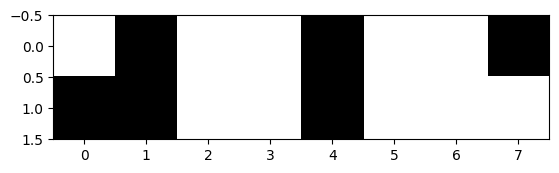

In [4]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



$$U_{x}=\sum_{c \in C}V_{c}(x_{i},\ldots,s\in C)=12\beta$$


#A1


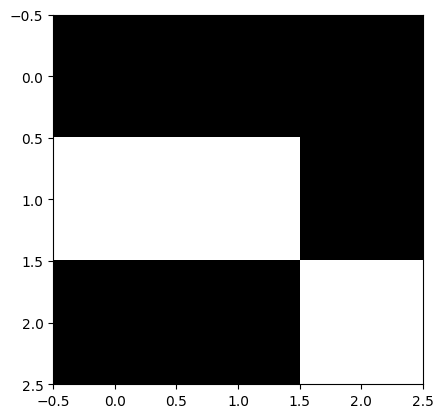

In [5]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2
$$Pr(Xs = xs/ Vs) = \frac{1}{Z^s} exp( −U_s(x_s, V_s))$$

$$Us
(xs, Vs) = \sum_{Xc⊂C,s∈c}Vc(xs, Vs) $$

$$
Z^s=\sum_{ξ∈E}exp( − Us(ξ, Vs))
$$

In the image above:

8  - connectivity


$$U_s(x_s = 1, V_s=(0,0,0,1,1,1,1,0)) = 4 \beta$$
$$U_s(x_s = 0,V_s=(0,0,0,1,1,1,1,0)) = 4\beta$$

$$P(X_s = 0| V_s) = \frac{exp(- 4 \beta)}{exp(- 4 \beta) + exp(- 4 \beta) }$$
$$P(X_s = 1| V_s) = \frac{exp(- 4 \beta)}{exp(- 4 \beta) + exp(- 4 \beta) }$$

in this case they're equally likely


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



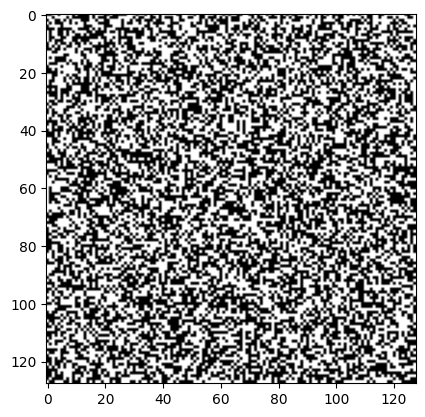

In [6]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [7]:
def calculateEnergies(classProb,i1,i2,j1,j2, beta):
	sum = 0
	if classProb != i1:
		sum += beta
	if classProb != i2:
		sum += beta
	if classProb != j1:
		sum += beta
	if classProb != j2:
		sum += beta
	return sum

def echan(im_bin,beta_reg):
	averageP0 = 0
	averageP1 = 0
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],beta_reg)
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],beta_reg)
			p1=math.exp(-Ureg1);
			averageP1 += p1/(p0+p1)
			averageP0 += p0/(p0+p1)
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	averageP0 = averageP0/(im_bin.shape[0]*im_bin.shape[1])
	averageP1 = averageP1/(im_bin.shape[0]*im_bin.shape[1])
	print(averageP0)
	print(averageP1)
	return im_bin




By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

0.5049958264917751
0.4950041735082259
0.5076920876930714
0.4923079123069306
0.5133145820679742
0.4866854179320281
0.5175983817768145
0.4824016182231886
0.5189422746270443
0.48105772537295943
0.5165451458539456
0.48345485414605893
0.5162453729443743
0.48375462705562955
0.5221387099503781
0.47786129004962685
0.5266334959560878
0.47336650404391867
0.5276405869729445
0.4723594130270609


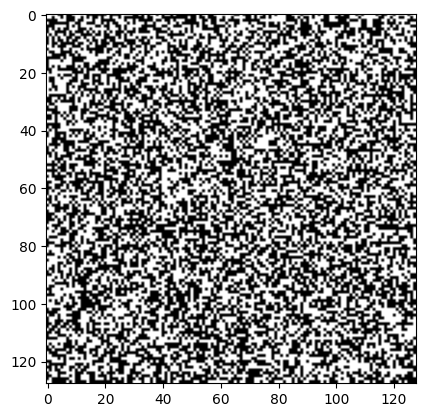

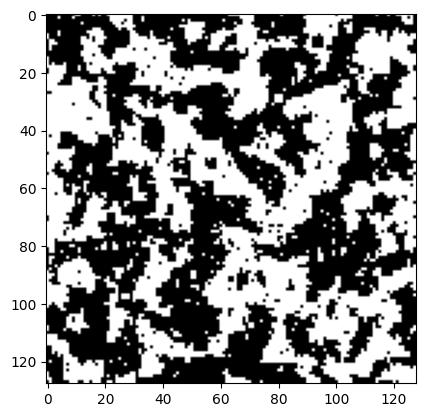

In [9]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 1

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

It is not the same image, at the beginning it varies a lot but then, although it changes, the variation is smaller, it is as if it was reaching a convergence point, this is perhaps explained by the fact that the images $$X_{0},X_{1},..,X_{n}$$ satisfy the property of being a markov chain, which under certain conditions have convergence.



#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4
The larger the value of Beta, the faster the convergence state appears to be reached, perhaps because as Beta increases, the difference between the low and high energy states also increases, leading to a preference for one of the energy states in the final distribution.

$$
P(X_s = 0 | Vs) \propto \exp(-a\beta) = \frac{1}{\exp(a\beta)}
$$
$$
P(X_s = 1 | Vs) \propto \exp(-b\beta) = \frac{1}{\exp(b\beta)}
$$
$$
\frac{P(X_s = 0 | Vs)}{P(X_s = 1 | Vs)} \propto  \frac{\exp(b\beta)}{\exp(a\beta)} = \exp(\beta(a-b))
$$


#Q5
Which image minimizes the overall energy for this model?

#A5
When the image has the same color in all pixels, i.e., it is either completely black or completely white
But if we talk about the images given for the different values of Beta
It would be the resulting image with the value of Beta=20, after the iterations, because the image is more uniform and given our definition of click the more uniform the less energy.


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

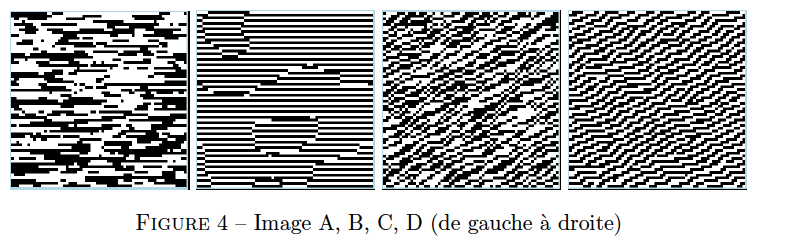

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7
For A: 
In the horizontal we have
$V_{c}(0,0)=V_{c}(1,1) = -1$

For B: 
In the horizontal we have
$V_{c}(0,0)=V_{c}(1,1) = -1$
and in the vertical we have
$V_{c}(0,0)=V_{c}(1,1) = 1$

For C: 
In the horizontal we have
$V_{c}(0,0)=V_{c}(1,1) = -1$
and in the vertical we have
$V_{c}(0,0)=V_{c}(1,1) = 1$
and in the diagonal $(\frac{\pi}{4})$ we have
$V_{c}(0,0)=V_{c}(1,1) = -1$

For D: 
In the horizontal we have
$V_{c}(0,0)=V_{c}(1,1) = -1$
and in the vertical we have
$V_{c}(0,0)=V_{c}(1,1) = 1$
and in the diagonal $(\frac{\pi}{4})$ we have
$V_{c}(0,0)=V_{c}(1,1) = -1$
and in the diagonal $(\frac{3\pi}{4})$ we have
$V_{c}(0,0)=V_{c}(1,1) = 1$

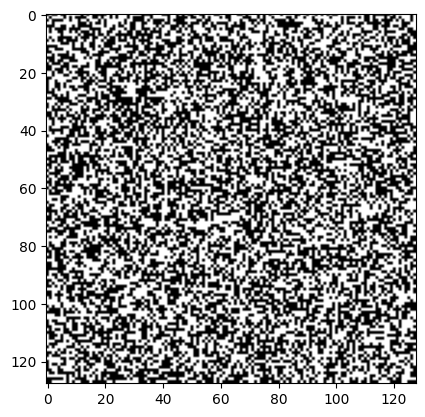

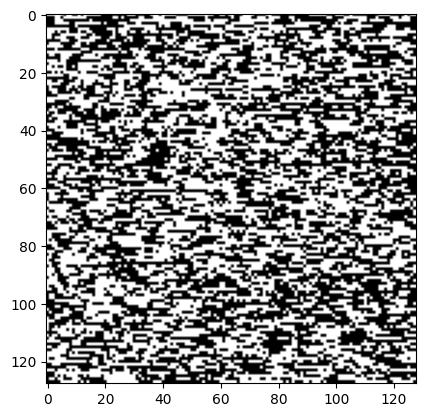

In [18]:
def calculateEnergies(classProb,i1, i2, beta,typ='d'):
	sum = 0
	#A
	if typ == 'd':
		if classProb != i1:
			sum += -1
		if classProb != i2:
			sum += -1
	else:
		if classProb == i1:
			sum += -1
		if classProb == i2:
			sum += -1
	#A
	return sum

def echan(im_bin,beta_reg):
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i,j1],im_bin[i,j2],beta_reg,'e')
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i,j1],im_bin[i,j2],beta_reg,'e')
			p1=math.exp(-Ureg1);
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 20

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(20):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

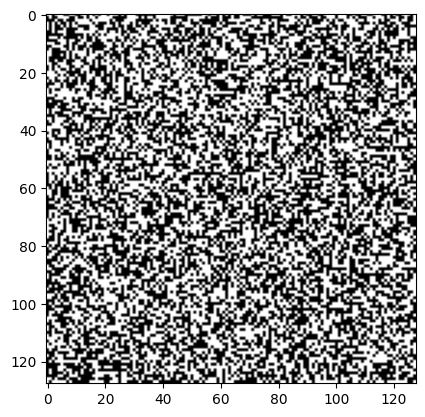

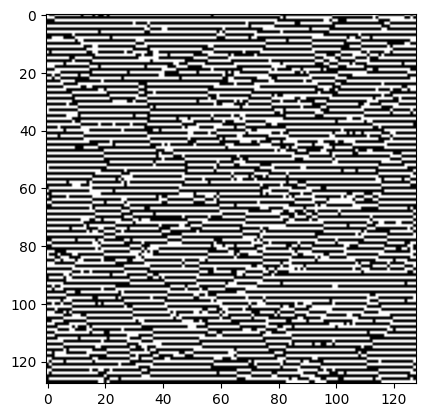

In [21]:
def calculateEnergies(classProb,i1, i2,i3,i4, beta,typ='d'):
	sum = 0
	#A
	if classProb == i1:
		sum += -1
	if classProb == i2:
		sum += -1
	#A
	#B
	if typ == 'd':
		if classProb != i3:
			sum += 1
		if classProb != i4:
			sum += 1
	else:
		if classProb == i3:
			sum += 1
		if classProb == i4:
			sum += 1
	return sum
	#B

def echan(im_bin,beta_reg):
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],beta_reg,'e')
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],beta_reg,'e')
			p1=math.exp(-Ureg1);
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 20

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(20):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

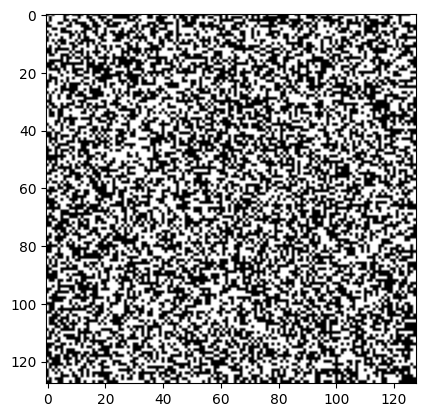

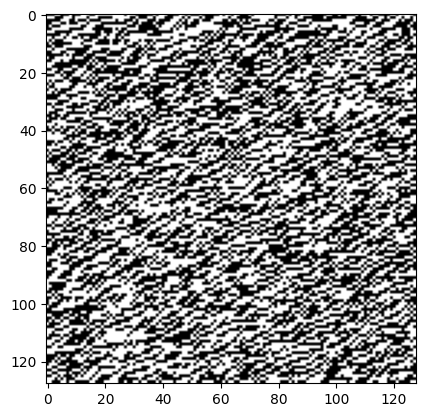

In [23]:
def calculateEnergies(classProb,i1, i2, i3, i4, i5, i6, beta,typ='d'):
	sum = 0
	#A
	if classProb == i1:
		sum += -1
	if classProb == i2:
		sum += -1
	#A
	#B
	if classProb == i3:
		sum += 1
	if classProb == i4:
		sum += 1
	#B
	#C
	if typ == 'd':
		if classProb != i5:
			sum += -1
		if classProb != i6:
			sum += -1
	else:
		if classProb == i5:
			sum += -1
		if classProb == i6:
			sum += -1
	#C
	return sum

def echan(im_bin,beta_reg):
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],im_bin[i1,j2],im_bin[i2,j1],beta_reg,'e')
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],im_bin[i1,j2],im_bin[i2,j1],beta_reg,'e')
			p1=math.exp(-Ureg1);
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 20

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(20):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

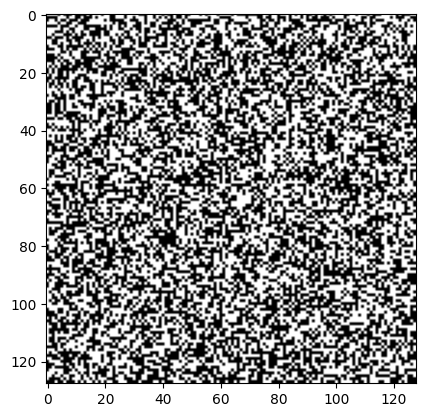

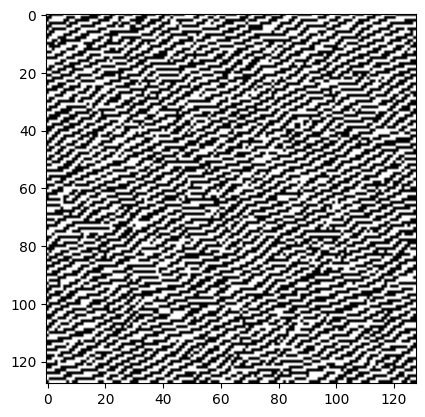

In [26]:
def calculateEnergies(classProb,i1, i2, i3, i4, i5, i6, i7, i8, beta,typ='d'):
	sum = 0
	#A
	if classProb == i1:
		sum += -1
	if classProb == i2:
		sum += -1
	#A
	#B
	if classProb == i3:
		sum += 1
	if classProb == i4:
		sum += 1
	#B
	#C
	if classProb == i5:
		sum += -1
	if classProb == i6:
		sum += -1
	#C
	#D
	if typ == 'd':
		if classProb != i7:
			sum += 1
		if classProb != i8:
			sum += 1
	else:
		if classProb == i7:
			sum += 1
		if classProb == i8:
			sum += 1
	#D
	return sum

def echan(im_bin,beta_reg):
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],im_bin[i1,j2],im_bin[i2,j1],im_bin[i1,j1],im_bin[i2,j2],beta_reg,'e')
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i,j1],im_bin[i,j2],im_bin[i1,j],im_bin[i2,j],im_bin[i1,j2],im_bin[i2,j1],im_bin[i1,j1],im_bin[i2,j2],beta_reg,'e')
			p1=math.exp(-Ureg1);
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 20

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(20):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8
Since the attractive potential is in the diagonals only, and we're applying it in only one of the diagonals (otherwise we would get a different pattern) we obtain this diagonal pattern since the pixels are motivated to have the values of their neighbors on the chosen diagonal

The patterns for both diagonals are shown below.

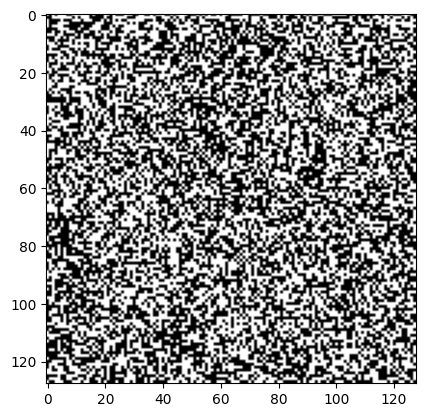

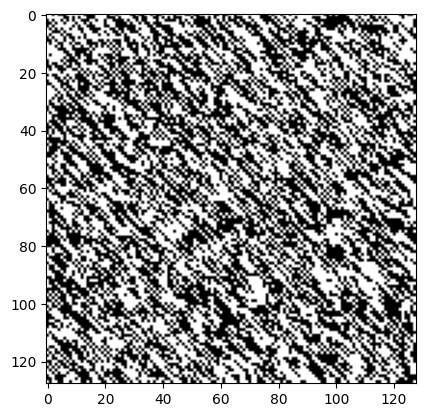

In [7]:
def calculateEnergies(classProb, i1, i2, beta):
	sum = 0
	if classProb != i1:
		sum += 1
	if classProb != i2:
		sum += 1

	return sum

def echan(im_bin,beta_reg):
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i1,j1],im_bin[i2,j2],beta_reg)
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i1,j1],im_bin[i2,j2],beta_reg)
			p1=math.exp(-Ureg1);
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 20

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(50):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

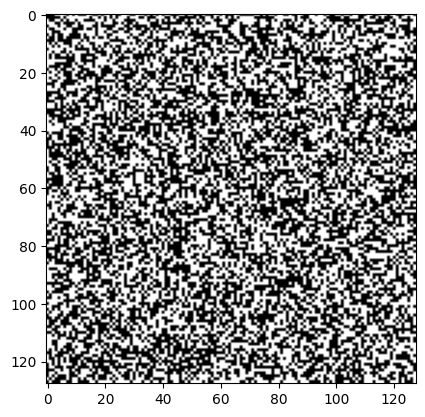

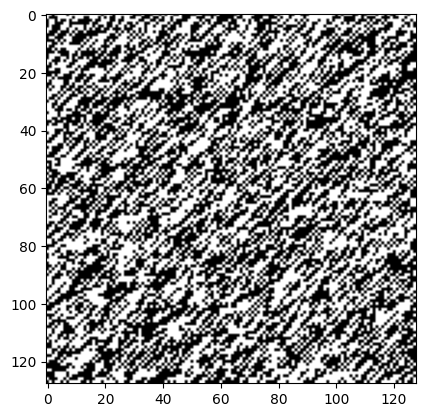

In [5]:
def calculateEnergies(classProb,i1, i2, beta):
	sum = 0
	if classProb != i1:
		sum += 1
	if classProb != i2:
		sum += 1
	return sum

def echan(im_bin,beta_reg):
	i=0;
	j=0;

	for i in range(im_bin.shape[0]):
		for j in range(im_bin.shape[1]):
		  # do not change these indices
		  # they allow access to neighboring pixels
		  # i1,j and i2,j and i,j1 and i,j2
			i1=(i-1)%im_bin.shape[0]
			i2=(i+1)%im_bin.shape[0]
			j1=(j-1)%im_bin.shape[1]
			j2=(j+1)%im_bin.shape[1]
		# complete the calculation of energies and associated probabilities
		# energy and non-normalized proba when the pixel is put in class 0
			Ureg0= calculateEnergies(0,im_bin[i1,j2],im_bin[i2,j1],beta_reg)
			p0=math.exp(-Ureg0);


		# energy and non-normalized proba when the pixel is put in class 1
			Ureg1= calculateEnergies(1,im_bin[i1,j2],im_bin[i2,j1],beta_reg)
			p1=math.exp(-Ureg1);
		# sampling according to the normalized probabilities. NB: the normalization is done here
			if (p0+p1!=0.):
				if(random.uniform(0,1)<p0/(p0+p1)):
					im_bin[i,j]=0
				else :
					im_bin[i,j]=1
	return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 20

#mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(50):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()